In [3]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convert job_skill column from string to clean list of skills
df['job_skills'] = df['job_skills'].apply(
    lambda x: [skill.strip().strip("[]()'\"") for skill in x.split(',')] if pd.notnull(x) else []
)



c:\Users\HP\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,[],None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [4]:
# Explode the 'job_skill' column so each skill gets its own row
df_exploded = df.explode('job_skills').copy()

# Group by 'job_title_short' and 'job_skill', and count occurrences
grouped = df_exploded.groupby(['job_title_short', 'job_skills']).size().reset_index(name='count')

print(grouped)



        job_title_short job_skills  count
0      Business Analyst    airflow    318
1      Business Analyst   airtable     17
2      Business Analyst    alteryx   1078
3      Business Analyst    angular     87
4      Business Analyst    ansible    120
...                 ...        ...    ...
2251  Software Engineer      wrike      4
2252  Software Engineer        wsl     13
2253  Software Engineer    xamarin     35
2254  Software Engineer       yarn    145
2255  Software Engineer       zoom    229

[2256 rows x 3 columns]


In [10]:
type(grouped)

pandas.core.frame.DataFrame

In [32]:
# Count the occurrences of each unique job skill
skill_counts = df_exploded['job_skills'].value_counts().reset_index()
skill_counts

,job_skills,count
0,sql,384849
1,python,380909
2,aws,145381
3,azure,132527
4,r,130892
...,...,...
247,msaccess,1
248,visualbasic,1
249,gtx,1
250,wimi,1


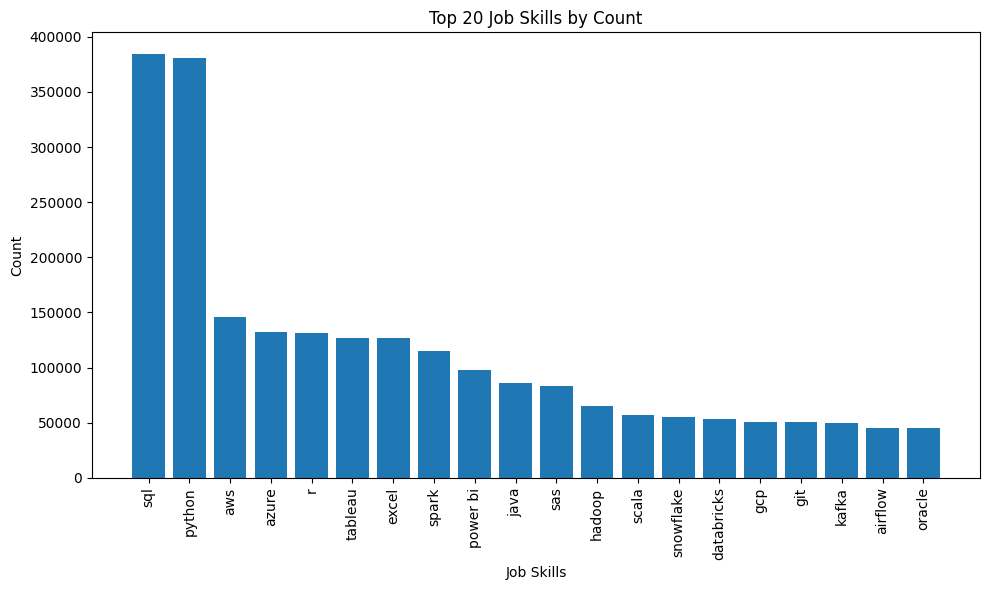

In [33]:
# Plot a bar diagram for the top 20 job skills
top_n = 20
plt.figure(figsize=(10, 6))
plt.bar(skill_counts['job_skills'][:top_n], skill_counts['count'][:top_n])
plt.xlabel('Job Skills')
plt.ylabel('Count')
plt.title(f'Top {top_n} Job Skills by Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [52]:
# Filter for 'Data Analyst' job_title_short
analyst_df = df[df['job_title_short'].str.lower() == 'data analyst']

# Explode the job_skill column
analyst_exploded = analyst_df.explode('job_skills')

# Count occurrences of each skill
skill_counts = analyst_exploded['job_skills'].value_counts().reset_index()
skill_counts.columns = ['job_skills', 'count']

In [54]:
skill_counts

,job_skills,count
0,sql,92428
1,excel,66860
2,python,57190
3,tableau,46455
4,power bi,39380
...,...,...
230,capacitor,1
231,gtx,1
232,ovh,1
233,esquisse,1


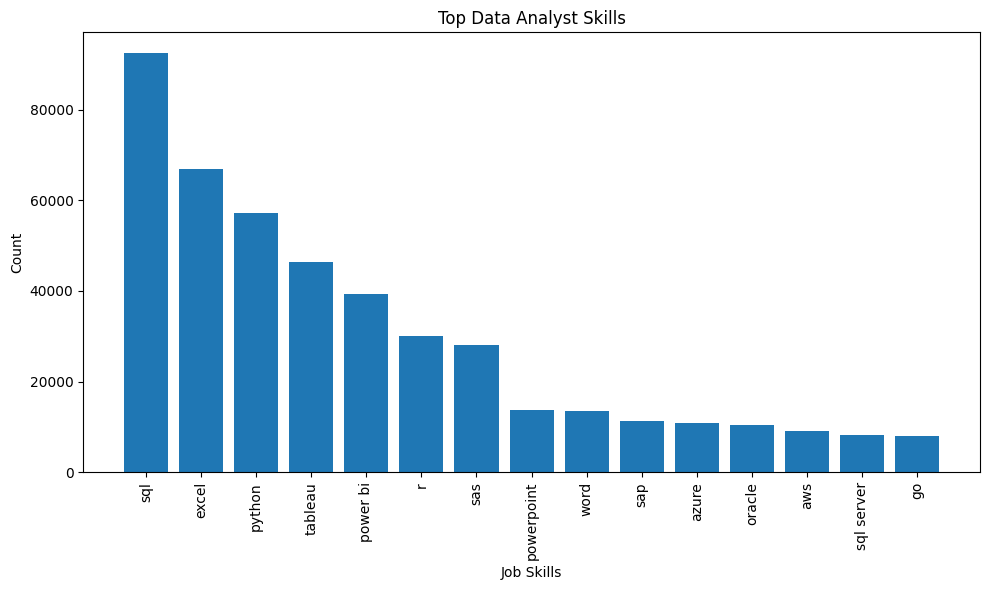

In [56]:
import matplotlib.pyplot as plt

# Plot the top 15 skills for Data Analyst roles as a bar chart
top_n = 15
plt.figure(figsize=(10, 6))
plt.bar(skill_counts['job_skills'][:top_n], skill_counts['count'][:top_n])
plt.xlabel('Job Skills')
plt.ylabel('Count')
plt.title('Top Data Analyst Skills')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [59]:


def plot_top_skills(df, job_title_short, top_n=10):
    # Filter for the selected job_title_short (case-insensitive)
    filtered_df = df[df['job_title_short'].str.lower() == job_title_short.lower()]
    # Explode the job_skill column
    exploded = filtered_df.explode('job_skills')
    # Count occurrences of each skill
    skill_counts = exploded['job_skills'].value_counts().reset_index()
    skill_counts.columns = ['job_skills', 'count']
    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(skill_counts['job_skills'][:top_n], skill_counts['count'][:top_n])
    plt.xlabel('Job Skills')
    plt.ylabel('Count')
    plt.title(f'Top {top_n} Skills for {job_title_short}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_top_skills(df, 'Data Analyst', top_n=15)


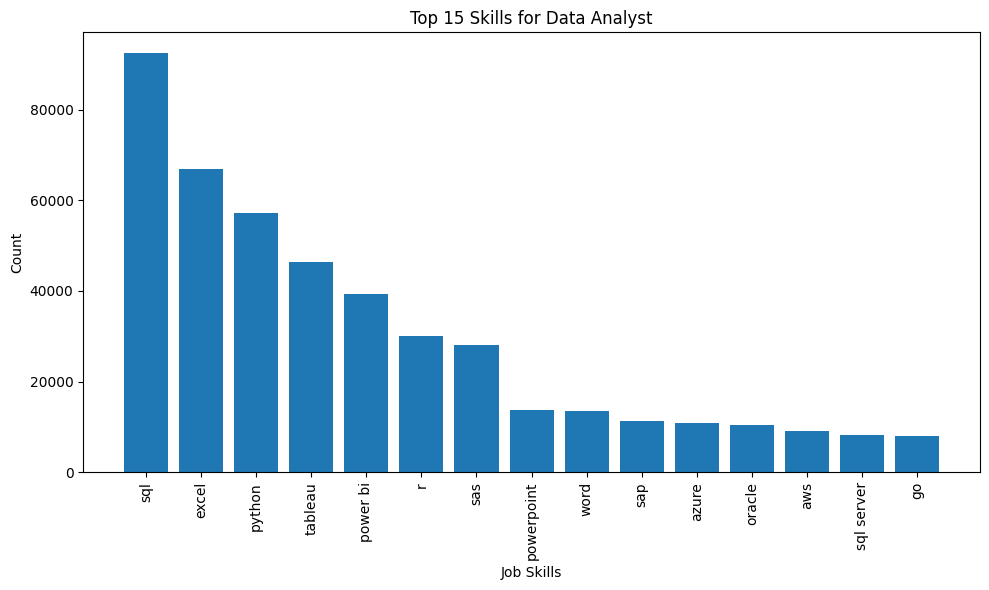

In [60]:
plot_top_skills(df, 'Data Analyst', top_n=15)

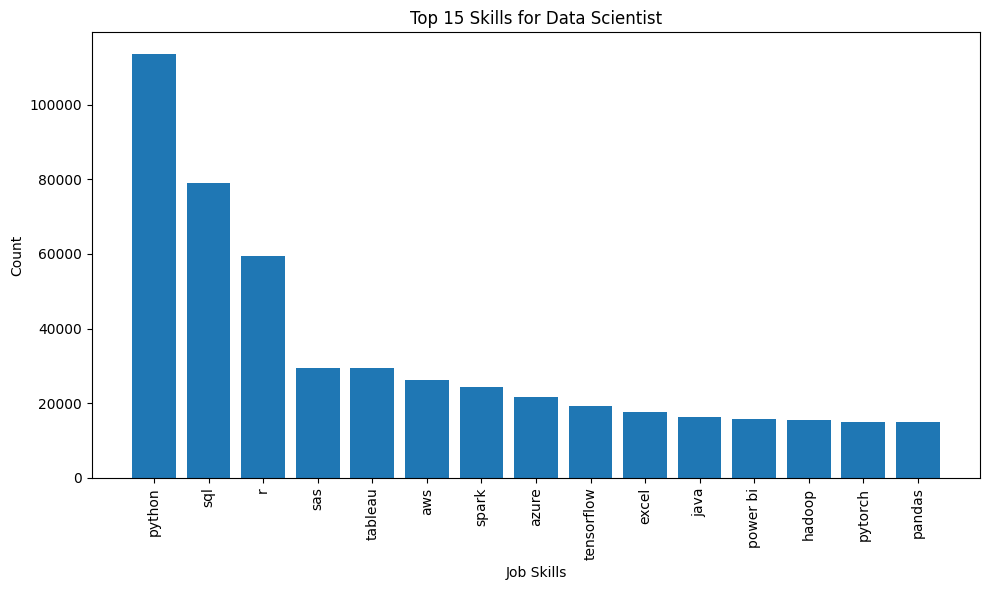

In [62]:
plot_top_skills(df,'Data Scientist', top_n=15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa